In [5]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd

### 时间较长，思考怎么改成多线程跑

In [6]:
# %%time
# def func(row, yht_rc_df):
#     return len(yht_rc_df[yht_rc_df.index == row])

# yht_rc_df["hcount"] = yht_rc_df["dt_point_holding.1"].apply(func, yht_rc_df=yht_rc_df)
# yht_rc_df.head()

### 校验部分

In [7]:
%%time
yht_rc_df = pd.read_csv("../data/yht_eur_bit_table.csv", index_col=["dt_point_holding"])
yht_rc_df.head()

CPU times: user 156 ms, sys: 11.9 ms, total: 168 ms
Wall time: 168 ms


,symbol,action,lots,open_date,close_date,open_price,close_price,profits,pips,commission,swaps,profits_calc,commission_by_pips,date_var,swap_per_date_var_and_pip,open_date_mod_5,close_date_mod_5,dt_range,dt_point_holding.1,dt_range_inter_num
dt_point_holding,,,,,,,,,,,,,,,,,,,,
2020-10-14 10:05:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,0.0,-0.344,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:05:00,30
2020-10-14 10:10:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,0.0,-0.344,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:10:00,30
2020-10-14 10:15:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,0.0,-0.344,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:15:00,30
2020-10-14 10:20:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,0.0,-0.344,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:20:00,30
2020-10-14 10:25:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,0.0,-0.344,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:25:00,30


In [8]:
%%time 
yht_rc_df_cnt = yht_rc_df.groupby(by=[yht_rc_df.index], dropna=False).agg({"symbol":"count"})
yht_rc_df_cnt[yht_rc_df_cnt["symbol"]>=10]

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 15.7 ms


,symbol
dt_point_holding,
2020-10-20 14:10:00,10
2020-10-20 14:15:00,11
2020-10-20 14:20:00,11
2020-10-20 14:25:00,11
2020-10-20 14:30:00,11
...,...
2021-06-17 01:35:00,10
2021-06-17 01:40:00,10
2021-06-17 01:45:00,10


In [11]:
from Utils.data_get_utils import get_duka_data_df
from Utils.data_process_utils import slice_df_by_timerange
from datetime import timedelta
from datetime import datetime

duka_5m_2020_df = get_duka_data_df("../data/EURUSD5_duka_2020.csv", "EURUSD")
duka_5m_2021_df = get_duka_data_df("../data/EURUSD5_duka_2021.csv", "EURUSD")
duka_5m_df = pd.concat([duka_5m_2020_df, duka_5m_2021_df])

rc_start_dt = pd.to_datetime(yht_rc_df.index).min() - timedelta(hours=2)
rc_end_dt = pd.to_datetime(yht_rc_df.index).max() + timedelta(hours=2)
print("slicing date range : (", rc_start_dt, ", ", rc_end_dt, ")")
duka_5m_df = slice_df_by_timerange(duka_5m_df, "datetime", rc_start_dt, rc_end_dt)

len(duka_5m_df)

slicing date range : ( 2020-10-14 08:05:00 ,  2021-07-09 05:05:00 )


54784

In [12]:
duka_5m_df[duka_5m_df["datetime"]=="2020-10-20 14:15:00"]

,symbol,datetime,open,high,low,close,volume
84555,EURUSD,2020-10-20 14:15:00,1.18298,1.18375,1.18281,1.1837,5123.04


In [13]:
yht_rc_df[yht_rc_df.index=="2020-10-20 14:15:00"]

,symbol,action,lots,open_date,close_date,open_price,close_price,profits,pips,commission,swaps,profits_calc,commission_by_pips,date_var,swap_per_date_var_and_pip,open_date_mod_5,close_date_mod_5,dt_range,dt_point_holding.1,dt_range_inter_num
dt_point_holding,,,,,,,,,,,,,,,,,,,,
2020-10-20 14:15:00,EURUSD,sell,0.01,2020-10-20 14:08:36,2020-10-20 15:07:09,1.18248,1.18237,0.11,1.1,-0.04,0.0,-0.029,-0.40,0,0.0,2020-10-20 14:05:00,2020-10-20 15:05:00,0 days 01:00:00,2020-10-20 14:15:00,13
2020-10-20 14:15:00,EURUSD,sell,0.02,2020-10-20 14:09:25,2020-10-20 15:07:02,1.18263,1.18238,0.50,2.5,-0.09,0.0,-0.040,-0.45,0,0.0,2020-10-20 14:05:00,2020-10-20 15:05:00,0 days 01:00:00,2020-10-20 14:15:00,13
2020-10-20 14:15:00,EURUSD,sell,0.01,2020-10-20 14:08:05,2020-10-20 15:07:14,1.18237,1.18226,0.11,1.1,-0.04,0.0,-0.029,-0.40,0,0.0,2020-10-20 14:05:00,2020-10-20 15:05:00,0 days 01:00:00,2020-10-20 14:15:00,13
2020-10-20 14:15:00,EURUSD,sell,0.01,2020-10-20 12:40:08,2020-10-20 18:57:06,1.18149,1.18272,-1.23,-12.3,-0.04,0.0,-0.163,-0.40,0,0.0,2020-10-20 12:40:00,2020-10-20 18:55:00,0 days 06:15:00,2020-10-20 14:15:00,76
2020-10-20 14:15:00,EURUSD,sell,0.02,2020-10-20 14:11:06,2020-10-20 15:04:50,1.18272,1.18260,0.24,1.2,-0.09,0.0,-0.066,-0.45,0,0.0,2020-10-20 14:10:00,2020-10-20 15:00:00,0 days 00:50:00,2020-10-20 14:15:00,11
2020-10-20 14:15:00,EURUSD,sell,0.02,2020-10-20 14:13:22,2020-10-20 15:03:38,1.18288,1.18253,0.70,3.5,-0.09,0.0,-0.020,-0.45,0,0.0,2020-10-20 14:10:00,2020-10-20 15:00:00,0 days 00:50:00,2020-10-20 14:15:00,11
2020-10-20 14:15:00,EURUSD,sell,0.01,2020-10-20 12:32:27,2020-10-20 18:56:43,1.18104,1.18273,-1.69,-16.9,-0.04,0.0,-0.209,-0.40,0,0.0,2020-10-20 12:30:00,2020-10-20 18:55:00,0 days 06:25:00,2020-10-20 14:15:00,78
2020-10-20 14:15:00,EURUSD,sell,0.02,2020-10-20 14:18:04,2020-10-20 15:00:10,1.18330,1.18318,0.24,1.2,-0.09,0.0,-0.066,-0.45,0,0.0,2020-10-20 14:15:00,2020-10-20 15:00:00,0 days 00:45:00,2020-10-20 14:15:00,10
2020-10-20 14:15:00,EURUSD,sell,0.01,2020-10-20 13:26:50,2020-10-20 18:57:12,1.18163,1.18272,-1.09,-10.9,-0.04,0.0,-0.149,-0.40,0,0.0,2020-10-20 13:25:00,2020-10-20 18:55:00,0 days 05:30:00,2020-10-20 14:15:00,67


In [19]:
%%time
from Utils.data_get_utils import calc_profit
import numpy as np

def calc_floating_profits(row, yht_rc_df):
    cur_dt,low,high = row["datetime"],row["low"],row["high"]
    cur_holding_orders_df = yht_rc_df[yht_rc_df.index == str(cur_dt)]
    
    cur_holding_orders_df["close_price"] = np.where(cur_holding_orders_df["action"]=="buy", low, high)
    cur_holding_orders_floating_profit_ser = calc_profit(cur_holding_orders_df, check_pips_eq=False, check_output_col=False)
    return sum(cur_holding_orders_floating_profit_ser)

yht_rc_used_df = yht_rc_df.copy()
# duka_5m_df["floating_profit"] = duka_5m_df.apply(calc_floating_profits, yht_rc_df=yht_rc_used_df, axis=1)
duka_5m_df["floating_profit"] = duka_5m_df.apply(calc_floating_profits, yht_rc_df=yht_rc_used_df, axis=1)

CPU times: user 4min 31s, sys: 64 ms, total: 4min 31s
Wall time: 4min 31s


In [21]:
duka_5m_df[duka_5m_df["datetime"]=="2020-10-20 14:15:00"]

,symbol,datetime,open,high,low,close,volume,floating_profit
84555,EURUSD,2020-10-20 14:15:00,1.18298,1.18375,1.18281,1.1837,5123.04,-23.71


In [34]:
yht_rc_df[yht_rc_df.index=="2020-10-20 14:15:00"]

,symbol,action,lots,open_date,close_date,open_price,close_price,profits,pips,commission,swaps,profits_calc,commission_by_pips,date_var,swap_per_date_var_and_pip,open_date_mod_5,close_date_mod_5,dt_range,dt_point_holding.1,dt_range_inter_num
dt_point_holding,,,,,,,,,,,,,,,,,,,,
2020-10-20 14:15:00,EURUSD,sell,0.01,2020-10-20 14:08:36,2020-10-20 15:07:09,1.18248,1.18237,0.11,1.1,-0.04,0.0,-0.029,-0.40,0,0.0,2020-10-20 14:05:00,2020-10-20 15:05:00,0 days 01:00:00,2020-10-20 14:15:00,13
2020-10-20 14:15:00,EURUSD,sell,0.02,2020-10-20 14:09:25,2020-10-20 15:07:02,1.18263,1.18238,0.50,2.5,-0.09,0.0,-0.040,-0.45,0,0.0,2020-10-20 14:05:00,2020-10-20 15:05:00,0 days 01:00:00,2020-10-20 14:15:00,13
2020-10-20 14:15:00,EURUSD,sell,0.01,2020-10-20 14:08:05,2020-10-20 15:07:14,1.18237,1.18226,0.11,1.1,-0.04,0.0,-0.029,-0.40,0,0.0,2020-10-20 14:05:00,2020-10-20 15:05:00,0 days 01:00:00,2020-10-20 14:15:00,13
2020-10-20 14:15:00,EURUSD,sell,0.01,2020-10-20 12:40:08,2020-10-20 18:57:06,1.18149,1.18272,-1.23,-12.3,-0.04,0.0,-0.163,-0.40,0,0.0,2020-10-20 12:40:00,2020-10-20 18:55:00,0 days 06:15:00,2020-10-20 14:15:00,76
2020-10-20 14:15:00,EURUSD,sell,0.02,2020-10-20 14:11:06,2020-10-20 15:04:50,1.18272,1.18260,0.24,1.2,-0.09,0.0,-0.066,-0.45,0,0.0,2020-10-20 14:10:00,2020-10-20 15:00:00,0 days 00:50:00,2020-10-20 14:15:00,11
2020-10-20 14:15:00,EURUSD,sell,0.02,2020-10-20 14:13:22,2020-10-20 15:03:38,1.18288,1.18253,0.70,3.5,-0.09,0.0,-0.020,-0.45,0,0.0,2020-10-20 14:10:00,2020-10-20 15:00:00,0 days 00:50:00,2020-10-20 14:15:00,11
2020-10-20 14:15:00,EURUSD,sell,0.01,2020-10-20 12:32:27,2020-10-20 18:56:43,1.18104,1.18273,-1.69,-16.9,-0.04,0.0,-0.209,-0.40,0,0.0,2020-10-20 12:30:00,2020-10-20 18:55:00,0 days 06:25:00,2020-10-20 14:15:00,78
2020-10-20 14:15:00,EURUSD,sell,0.02,2020-10-20 14:18:04,2020-10-20 15:00:10,1.18330,1.18318,0.24,1.2,-0.09,0.0,-0.066,-0.45,0,0.0,2020-10-20 14:15:00,2020-10-20 15:00:00,0 days 00:45:00,2020-10-20 14:15:00,10
2020-10-20 14:15:00,EURUSD,sell,0.01,2020-10-20 13:26:50,2020-10-20 18:57:12,1.18163,1.18272,-1.09,-10.9,-0.04,0.0,-0.149,-0.40,0,0.0,2020-10-20 13:25:00,2020-10-20 18:55:00,0 days 05:30:00,2020-10-20 14:15:00,67


In [29]:
duka_5m_df.set_index("datetime",inplace=True)
duka_5m_df.reset_index(inplace=True)

KeyError: "None of ['datetime'] are in the columns"

In [31]:
duka_5m_df

,symbol,open,high,low,close,volume,floating_profit
datetime,,,,,,,
2020-10-14 08:05:00,EURUSD,1.17440,1.17446,1.17404,1.17407,6584.5599,0.0
2020-10-14 08:10:00,EURUSD,1.17407,1.17424,1.17368,1.17376,6131.8500,0.0
2020-10-14 08:15:00,EURUSD,1.17375,1.17424,1.17375,1.17411,6511.8300,0.0
2020-10-14 08:20:00,EURUSD,1.17412,1.17430,1.17398,1.17415,5858.7401,0.0
2020-10-14 08:25:00,EURUSD,1.17415,1.17453,1.17396,1.17453,6695.3600,0.0
...,...,...,...,...,...,...,...
2021-07-09 04:45:00,EURUSD,1.18354,1.18361,1.18347,1.18355,247.3000,0.0
2021-07-09 04:50:00,EURUSD,1.18356,1.18377,1.18356,1.18370,270.0000,0.0
2021-07-09 04:55:00,EURUSD,1.18371,1.18371,1.18317,1.18318,449.0800,0.0


CPU times: user 168 ms, sys: 0 ns, total: 168 ms
Wall time: 167 ms


<AxesSubplot:xlabel='datetime'>

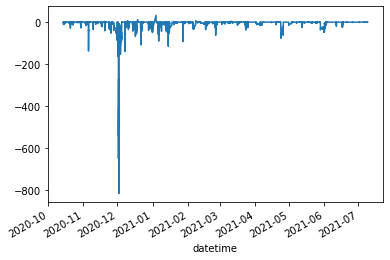

In [35]:
%%time
duka_5m_df["floating_profit"].plot()

In [36]:
duka_5m_df[duka_5m_df["floating_profit"]==duka_5m_df["floating_profit"].min()]

,symbol,open,high,low,close,volume,floating_profit
datetime,,,,,,,
2020-12-02 07:40:00,EURUSD,1.2083,1.20875,1.2083,1.20868,2246.02,-816.15


In [59]:
duka_5m_df[duka_5m_df.index=="2020-12-30 01:55:00"]

,symbol,open,high,low,close,volume,floating_profit
datetime,,,,,,,
2020-12-30 01:55:00,EURUSD,1.22933,1.22945,1.22904,1.22906,624.48,-30.84


In [61]:
yht_rc_df[(yht_rc_df.index=="2020-12-30 01:55:00")]["profits_calc"].sum()

-1.470000000000104